In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#Getting Train Data
Train_Data = pd.read_csv('train.csv',delimiter=',',header=0)    #Get the data from train.csv file
Test_Data = pd.read_csv('test.csv',delimiter=',',header=0)     #Get the data from test.csv
Y_Train = Train_Data.loc[:,"Survived"]   #Get the trained survival from the given train data
Y_Train = Y_Train[:,None]   

In [2]:
Y_Train.shape

(891, 1)

In [3]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Train_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Train_Data.corr(method ='pearson') 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(array([233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

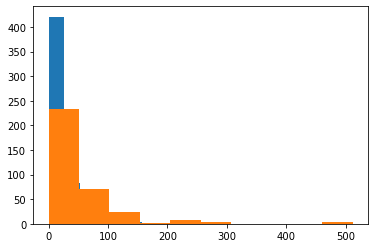

In [6]:
plt.hist(Train_Data.Fare[Train_Data['Survived'] == 0])
plt.hist(Train_Data.Fare[Train_Data['Survived'] == 1])

In [7]:
s = Train_Data[Train_Data['Survived'] == 1]
n = Train_Data[Train_Data['Survived'] == 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266543DDB48>,
      dtype=object)

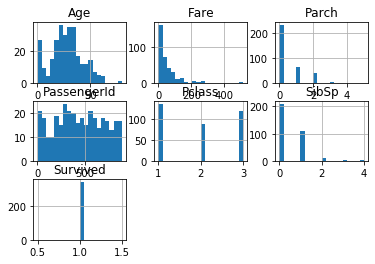

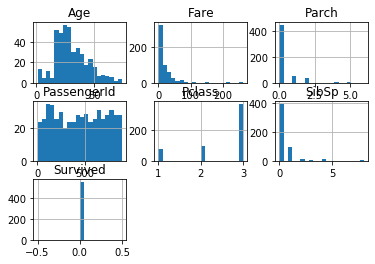

In [8]:
s.hist(bins=20)
n.hist(bins=20)

In [9]:
Test_Data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
X_Train = Train_Data.drop(columns=['Survived'])
X_Test = Test_Data

In [12]:
X_Data = pd.concat([X_Train, X_Test], sort=True).reset_index(drop=True)
X_Data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450


In [13]:
X_Data.corr(method ='pearson') 

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000


In [14]:
X_Data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000


In [15]:
#A fuction to sort the names into classes
def NameClassify (Name_Salute):
    Name_Salute = Name_Salute.replace('Mlle','Miss')  #replace mlle with miss
    Name_Salute = Name_Salute.replace('Major','Mr')
    Name_Salute = Name_Salute.replace('Col','Mr') 
    Name_Salute = Name_Salute.replace('Sir','Mr') 
    Name_Salute = Name_Salute.replace('Don','Mr') 
    Name_Salute = Name_Salute.replace('Ms','Miss')   #replace ms with miss
    Name_Salute = Name_Salute.replace('Mme','Miss') #replace mme with mrs
    Name_Salute = Name_Salute.replace('Jonkheer','Mr') 
    Name_Salute = Name_Salute.replace('Capt','Mr')
    Name_Salute = Name_Salute.replace('Lady','Mrs')
    Name_Salute = Name_Salute.replace('Countess','Mrs')
    Name_Salute = Name_Salute.replace('Dona','Mrs')
    
    Name_Salute = Name_Salute.replace("Master",0) #classify master into group 0
    Name_Salute = Name_Salute.replace("Miss",1) #classify master into group 1
    Name_Salute = Name_Salute.replace("Mr",2)     #classify master into group 2
    Name_Salute = Name_Salute.replace("Mrs",3)   #classify master into group 3
    Name_Salute  = Name_Salute.replace('Rev',4) #classify into group 4
    Name_Salute  = Name_Salute.replace('Dr',5) #classify into group 5
    
    Name_Salute = np.array(Name_Salute)   #convert to numpy array
    return Name_Salute[:,0] #return the first coloumn

In [16]:
#Data Preprocessing steps

from sklearn.preprocessing import LabelEncoder

#Defining empty Dataframes for test and train
Train_X = pd.DataFrame()
Test_X = pd.DataFrame()

#one hot encoded: sex for train and test data
Train_X["Sex"] =  (X_Train.loc[:,"Sex"] == 'female').astype(int)
Test_X["Sex"] =  (X_Test.loc[:,"Sex"] == 'female').astype(int)
temp1 = pd.get_dummies(pd.concat([Train_X["Sex"],Test_X["Sex"]],keys=[0,1]), columns=['Sex'],prefix='Sex')
one_hot_train , one_hot_test = temp1.xs(0),temp1.xs(1)
Train_X = Train_X.join(one_hot_train)
Train_X = Train_X.drop(columns=['Sex'])
Test_X = Test_X.join(one_hot_test)
Test_X = Test_X.drop(columns=['Sex'])

#Normalize: Age for train and test data 
mean_age = X_Data.loc[:,"Age"].mean()
min_age = min(X_Data.loc[:,"Age"])
max_age = max(X_Data.loc[:,"Age"])
Train_X["Age"] = X_Train.loc[:,"Age"].fillna(mean_age)
Train_X['Age'] = (Train_X['Age'] - min_age)/(max_age- min_age)
Test_X["Age"] = X_Test.loc[:,"Age"].fillna( mean_age)
Test_X['Age'] = (Test_X['Age'] - min_age)/(max_age- min_age)

#one hot encoded: Pclass for train and test data
temp2 = pd.get_dummies(pd.concat([X_Train["Pclass"],X_Test["Pclass"]],keys=[0,1]), columns=['Pclass'],prefix='Pclass')
one_hot_train , one_hot_test = temp2.xs(0),temp2.xs(1)
Train_X = Train_X.join(one_hot_train)
Test_X = Test_X.join(one_hot_test)

#Normalize: Family (= Sibsp + Parch) for train and test data 
Train_X['Family'] = ((X_Train.loc[:,"SibSp"]  + X_Train.loc[:,"Parch"] )/3).astype(int) 
Test_X['Family'] = ((X_Test.loc[:,"SibSp"]  + X_Test.loc[:,"Parch"] )/3).astype(int) 
Train_X['Family'].values[Train_X['Family'] > 2] = 2
Test_X['Family'].values[Test_X['Family'] > 2] = 2

#Normalize: SibSp for train and test data 
Train_X['SibSp'] = (X_Train.loc[:,"SibSp"] - min(X_Data.loc[:,"SibSp"])) / (max(X_Data.loc[:,"SibSp"]) - min(X_Data.loc[:,"SibSp"]))
Test_X['SibSp'] = (X_Test.loc[:,"SibSp"] - min(X_Data.loc[:,"SibSp"])) / (max(X_Data.loc[:,"SibSp"]) - min(X_Data.loc[:,"SibSp"]))

#Normalize: Parch for train and test data 
Train_X['Parch'] = (X_Train.loc[:,"Parch"] - min(X_Data.loc[:,"Parch"])) / (max(X_Data.loc[:,"Parch"]) - min(X_Data.loc[:,"Parch"]))
Test_X['Parch'] = (X_Test.loc[:,"Parch"] - min(X_Data.loc[:,"Parch"])) / (max(X_Data.loc[:,"Parch"]) - min(X_Data.loc[:,"Parch"]))

#One hot encoded: Names after classification for train and test data
Train_X['Salute'] = NameClassify (X_Train.loc[:,"Name"].str.extract(' ([A-Za-z]+)\. ') ) #from the data of names extract the salutation
Test_X['Salute'] = NameClassify (X_Test.loc[:,"Name"].str.extract(' ([A-Za-z]+)\. ') )
temp4 = pd.get_dummies(pd.concat([Train_X["Salute"],Test_X["Salute"]],keys=[0,1]), columns=['Salute'],prefix='Name')
one_hot_train , one_hot_test = temp4.xs(0),temp4.xs(1)
Train_X = Train_X.join(one_hot_train)
Train_X = Train_X.drop(columns=['Salute'])
Test_X = Test_X.join(one_hot_test)
Test_X = Test_X.drop(columns=['Salute'])

#One hot encoded: Fare after classification for train and test data
mean_fare = X_Data.loc[:,"Fare"].mean()
min_fare = min(X_Data.loc[:,"Age"])
max_fare = max(X_Data.loc[:,"Age"])
X_Data["Fare"] = X_Data.loc[:,"Fare"].fillna(mean_fare)
X_Data['FareBin'],bins = pd.qcut(X_Data['Fare'], 5 , retbins=True)
Train_X["Fare"] = X_Train.loc[:,"Fare"].fillna(mean_fare)
Train_X["Fare"] = pd.cut(Train_X["Fare"],bins=bins,labels=False,include_lowest=True)
Test_X["Fare"] = X_Test.loc[:,"Fare"].fillna( mean_fare)
Test_X["Fare"] = pd.cut(Test_X["Fare"],bins=bins,labels=False,include_lowest=True)


In [17]:
Train_X.head()

,Sex_0,Sex_1,Age,Pclass_1,Pclass_2,Pclass_3,Family,SibSp,Parch,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Fare
0,1,0,0.273456,0,0,1,0,0.125,0.0,0,0,1,0,0,0,0
1,0,1,0.473882,1,0,0,0,0.125,0.0,0,0,0,1,0,0,4
2,0,1,0.323563,0,0,1,0,0.000,0.0,0,1,0,0,0,0,1
3,0,1,0.436302,1,0,0,0,0.125,0.0,0,0,0,1,0,0,4
4,1,0,0.436302,0,0,1,0,0.000,0.0,0,0,1,0,0,0,1


In [18]:
Train_X.describe()

,Sex_0,Sex_1,Age,Pclass_1,Pclass_2,Pclass_3,Family,SibSp,Parch,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.352413,0.370353,0.242424,0.206510,0.551066,0.130191,0.065376,0.042399,0.044893,0.208754,0.589226,0.142536,0.006734,0.007856,1.984287
std,0.477990,0.477990,0.162874,0.428790,0.405028,0.497665,0.411762,0.137843,0.089562,0.207186,0.406647,0.492251,0.349796,0.081830,0.088337,1.410944
min,0.000000,0.000000,0.003132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.273456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.372180,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,0.436302,0.000000,0.000000,1.000000,0.000000,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [19]:
#Not using: Partition of test and validation from training data set
msk = np.random.rand(len(X_Train)) < 0.95
train_X = Train_X[msk]
test_X = Train_X[~msk]
train_Y = Y_Train[msk]
test_Y = Y_Train[~msk]
print (train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(846, 16) (45, 16) (846, 1) (45, 1)


In [20]:
import tensorflow.keras.models as models #use learning models from keras
import tensorflow.keras.layers as layers #use layers from keras
from tensorflow.keras.optimizers import SGD #SGD optimizer from keras
from keras.callbacks import LearningRateScheduler #callback features from keras
from keras.callbacks import History #callback features from keras

#Setting learning rate decay rate and momentum for the learning
learning_rate = 0.1
decay_rate = learning_rate / 100
momentum = 0.95

#defining thr optimizer
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

#Simple NN model with 3 hidden layers with 526 Neurons each.
model = models.Sequential()
model.add(layers.Dense(526, input_dim=train_X.shape[1], activation='relu'))
model.add(layers.Dense(526, activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(526, activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#compiling the model with poisson loss
model.compile(loss='poisson',optimizer=sgd,metrics=['acc'])

# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

Using TensorFlow backend.


In [21]:
#Fit the model
history = model.fit(Train_X, Y_Train, validation_data=(test_X, test_Y), epochs=175, batch_size=9,callbacks=callbacks_list,)

#Accuracy for training data set
_, accuracy = model.evaluate(Train_X, Y_Train)
print('Accuracy: %.2f' % (accuracy*100))

Train on 891 samples, validate on 45 samples
Epoch 1/175
891/891 [==============================] - 1s 822us/sample - loss: 0.7320 - acc: 0.7172 - val_loss: 0.6825 - val_acc: 0.8000
Epoch 2/175
891/891 [==============================] - 0s 470us/sample - loss: 0.6661 - acc: 0.7789 - val_loss: 0.6916 - val_acc: 0.8000
Epoch 3/175
891/891 [==============================] - 0s 441us/sample - loss: 0.6603 - acc: 0.7767 - val_loss: 0.7086 - val_acc: 0.7778
Epoch 4/175
891/891 [==============================] - 0s 471us/sample - loss: 0.6518 - acc: 0.8070 - val_loss: 0.6685 - val_acc: 0.8000
Epoch 5/175
891/891 [==============================] - 0s 444us/sample - loss: 0.6333 - acc: 0.8126 - val_loss: 0.6580 - val_acc: 0.8222
Epoch 6/175
891/891 [==============================] - 0s 465us/sample - loss: 0.6247 - acc: 0.8058 - val_loss: 0.6644 - val_acc: 0.7778
Epoch 7/175
891/891 [==============================] - 0s 480us/sample - loss: 0.6172 - acc: 0.8316 - val_loss: 0.6602 - val_acc: 0.8

891/891 [==============================] - 0s 480us/sample - loss: 0.5953 - acc: 0.8339 - val_loss: 0.6477 - val_acc: 0.7778
Epoch 61/175
891/891 [==============================] - 0s 460us/sample - loss: 0.5926 - acc: 0.8361 - val_loss: 0.6462 - val_acc: 0.8444
Epoch 62/175
891/891 [==============================] - 0s 500us/sample - loss: 0.5935 - acc: 0.8350 - val_loss: 0.6468 - val_acc: 0.8222
Epoch 63/175
891/891 [==============================] - 0s 478us/sample - loss: 0.5930 - acc: 0.8406 - val_loss: 0.6456 - val_acc: 0.8000
Epoch 64/175
891/891 [==============================] - 0s 450us/sample - loss: 0.5924 - acc: 0.8384 - val_loss: 0.6496 - val_acc: 0.8000
Epoch 65/175
891/891 [==============================] - 0s 478us/sample - loss: 0.5937 - acc: 0.8350 - val_loss: 0.6469 - val_acc: 0.7778
Epoch 66/175
891/891 [==============================] - 0s 505us/sample - loss: 0.5964 - acc: 0.8361 - val_loss: 0.6502 - val_acc: 0.7778
Epoch 67/175
891/891 [=========================

891/891 [==============================] - 0s 467us/sample - loss: 0.5879 - acc: 0.8384 - val_loss: 0.6429 - val_acc: 0.7778
Epoch 120/175
891/891 [==============================] - 0s 447us/sample - loss: 0.5903 - acc: 0.8328 - val_loss: 0.6500 - val_acc: 0.7778
Epoch 121/175
891/891 [==============================] - 0s 452us/sample - loss: 0.5902 - acc: 0.8373 - val_loss: 0.6517 - val_acc: 0.8000
Epoch 122/175
891/891 [==============================] - 0s 463us/sample - loss: 0.5915 - acc: 0.8339 - val_loss: 0.6511 - val_acc: 0.7778
Epoch 123/175
891/891 [==============================] - 0s 476us/sample - loss: 0.5890 - acc: 0.8440 - val_loss: 0.6512 - val_acc: 0.8000
Epoch 124/175
891/891 [==============================] - 0s 484us/sample - loss: 0.5882 - acc: 0.8474 - val_loss: 0.6489 - val_acc: 0.8000
Epoch 125/175
891/891 [==============================] - 0s 482us/sample - loss: 0.5889 - acc: 0.8384 - val_loss: 0.6495 - val_acc: 0.7778
Epoch 126/175
891/891 [==================

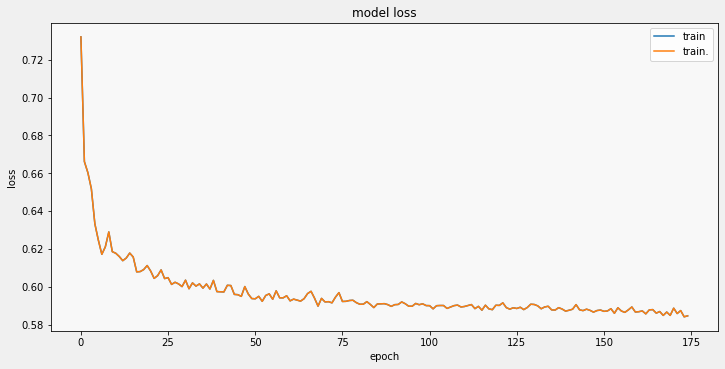

In [22]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'train.'])

#Loss Curve Display
display_training_curves(
    history.history['loss'],
    history.history['loss'],
    'loss',
    211,
)

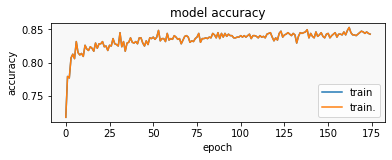

In [23]:
#Accuracy Curve Display
display_training_curves(
    history.history['acc'],
    history.history['acc'],
    'accuracy',
    212,
)

In [24]:
Test_X.head()

,Sex_0,Sex_1,Age,Pclass_1,Pclass_2,Pclass_3,Family,SibSp,Parch,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Fare
0,1,0,0.430039,0,0,1,0,0.000,0.000000,0,0,1,0,0,0,0
1,0,1,0.586622,0,0,1,0,0.125,0.000000,0,0,0,1,0,0,0
2,1,0,0.774521,0,1,0,0,0.000,0.000000,0,0,1,0,0,0,1
3,1,0,0.336089,0,0,1,0,0.000,0.000000,0,0,1,0,0,0,1
4,0,1,0.273456,0,0,1,0,0.125,0.111111,0,0,0,1,0,0,2


In [25]:
#Predicting the data
predictions = model.predict_classes(Test_X)
print ("Survived cases in test: " ,np.sum(predictions==1),predictions.shape[0])
predictions = predictions[:,0]
print (predictions.shape)

Survived cases in test:  147 418
(418,)


In [26]:
#creating the submission file
submission = pd.DataFrame({
    "PassengerId": Test_Data.loc[:,"PassengerId"],
    "Survived": predictions
})
submission.to_csv('submission.csv', index = False)

In [27]:
#Loading Output of the kaggle competition
Output = pd.read_csv('output.csv',delimiter=',',header=0)  

In [28]:
#Checking the Accuracy of the model on test dataset
Output = Output.Survived
print ((sum(Output==predictions))/Output.shape[0]*100)

79.18660287081339
